In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("CLM_PMT_AMT_Predictor.csv")
data_no_nan = data.fillna(0)
data_no_nan = data_no_nan.fillna(0)

In [3]:
data_no_nan.head()

,CLM_ID,NCH_PRMRY_PYR_CLM_PD_AMT,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,CLM_YEAR_MONTH_CLM_FROM_DT_CAT,CLM_YEAR_MONTH_CLM_THRU_DT_CAT,NCH_BENE_DSCHRG_DT_YEAR_MONTH_CAT,ICD9_PRCDR_CD_1_CAT,ICD9_DGNS_CD_2_CAT,ICD9_DGNS_CD_3_CAT,DESYNPUF_ID_CAT,CLM_ADMSN_DT_CAT,CLM_PMT_AMT
0,1.966610e+14,0,0,1100.0,0,0,1.0,28,26,26,-1,2120,2758,0,826,4000
1,1.962010e+14,0,0,1068.0,0,0,6.0,17,15,15,-1,892,1509,1,492,26000
2,1.966610e+14,0,0,1068.0,0,0,2.0,21,20,20,774,516,1407,1,633,5000
3,1.960910e+14,0,0,1068.0,0,0,3.0,22,20,20,-1,586,1768,1,650,5000
4,1.962610e+14,0,0,1100.0,0,0,5.0,31,30,30,-1,892,783,1,932,16000


In [4]:
data_no_nan.isnull().sum()

CLM_ID                               0
NCH_PRMRY_PYR_CLM_PD_AMT             0
CLM_PASS_THRU_PER_DIEM_AMT           0
NCH_BENE_IP_DDCTBL_AMT               0
NCH_BENE_PTA_COINSRNC_LBLTY_AM       0
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM       0
CLM_UTLZTN_DAY_CNT                   0
CLM_YEAR_MONTH_CLM_FROM_DT_CAT       0
CLM_YEAR_MONTH_CLM_THRU_DT_CAT       0
NCH_BENE_DSCHRG_DT_YEAR_MONTH_CAT    0
ICD9_PRCDR_CD_1_CAT                  0
ICD9_DGNS_CD_2_CAT                   0
ICD9_DGNS_CD_3_CAT                   0
DESYNPUF_ID_CAT                      0
CLM_ADMSN_DT_CAT                     0
CLM_PMT_AMT                          0
dtype: int64

In [5]:
train1 = data_no_nan.drop(['CLM_PMT_AMT'],axis=1)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
labels = data_no_nan['CLM_PMT_AMT']

In [10]:
from sklearn.cross_validation import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [11]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
reg.score(x_test,y_test)

0.12131208997851552

In [35]:
from sklearn import ensemble
params = {'n_estimators': 4000, 'max_depth': 5, 'min_samples_split':2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [36]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [37]:
clf.score(x_test,y_test)

0.5021815576645059

In [48]:
y_pred = reg.predict(x_test)

In [49]:
y_pred = reg.predict(x_test)

In [50]:
y_pred

array([  9736.06771633,  12311.99383841,   7276.42275304, ...,
         8446.4192896 ,  13932.24214512,   8911.1796615 ])

In [51]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [52]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [53]:
testsc = np.arange((params['n_estimators']))+1

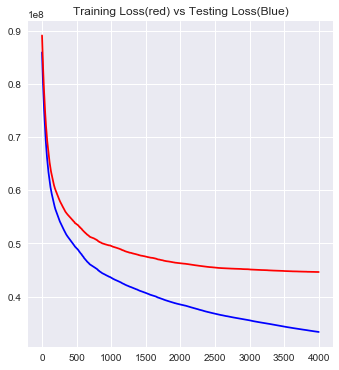

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.title("Training Loss(red) vs Testing Loss(Blue)")
plt.plot(testsc,t_sc,'r-',label = 'set dev test')
plt.show()

In [54]:
import pickle

In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(clf, 'CLM_PMT_AMT_Predictor.pkl') 

['CLM_PMT_AMT_Predictor.pkl']

In [65]:
new_pred = clf.predict(np.array([[1.97E+14,0,0,1100,0,0,1,28,26,26,-1,2120,2758,0,826]]))

In [67]:
new_pred

array([ 3611.32044177])

In [68]:
 clf = joblib.load('CLM_PMT_AMT_Predictor.pkl') 

In [72]:
new_pred = clf.predict(np.array([[1.96E+14,0,0,1068,0,0,6,17,15,15,-1,892,1509,1,492]]))

In [73]:
round(new_pred[0])

22726.0